# Linear regression using Tensor Flow

Reuse the same univariate polynomial model as in the [univariate linear regression workbook](LinearRegressionUnivariate.html)  ([Jupyter Notebook](LinearRegressionUnivariate.ipynb)) but with a TensorFlow implementation

Learning goals:
- Use TensorFlow to perform the gradient descents. 
- Compare several optimizers.

References:
- https://databricks.com/tensorflow/training-and-convergence

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn import metrics 

## Data model

In [2]:
# Univariate
def generateBatch(N, stochastic = False):
    #
    xMin = 0
    xMax = 0.5
    #
    b = 0.35
    std = 0.01
    #
    if stochastic:
        x = np.random.uniform(xMin, xMax, N)
    else:
        x = np.linspace(xMin, xMax, N)
    yClean = x**4 + (x-0.3)**3 + b
    y =  yClean + np.random.normal(0, std, N) 
    return (x, y, yClean)

### Test data

In [3]:
Ntest = 100000
(xTest, yTest1, yTestClean1) = generateBatch(Ntest)

## Training model

Naming conventions:
- Symbols start with an uppercase letter
- Values start with a lowercase letter

In [4]:
# x and y are placeholders for our training data
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
# Initial intercept and weight
B = tf.Variable(1.0, name = 'b')
W = tf.Variable(1.0, name = 'w')
# Our model of y = a*x + b
Model1 = tf.multiply(X, W) + B
# Our error is defined as the square of the differences
Error = tf.losses.mean_squared_error(Y, Model1)
# Batch size
nBatch = 100
# Stop threshold on MSE
threshold = 1e-4

W0805 14:41:36.535999  8496 deprecation.py:323] From c:\users\antoi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Gradient descent optimizer

In [6]:
# Gradient Descent Optimizer
train1 = tf.train.GradientDescentOptimizer(0.01).minimize(Error)
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = []
with tf.Session() as session:
    session.run(model)
    while mse > threshold:
        (x_, y_, yClean) = generateBatch(nBatch, True)
        _, mse, w, b = session.run([train1, Error, W, B], feed_dict={X: x_, Y: y_})
        wLearn.append((w, b, mse))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w, b=b, c=len(wLearn)))
df1 = pandas.DataFrame(wLearn, columns = ('b', 'w', 'MSE'))

Predicted model: 0.161 x + 0.319, num iteration=9348


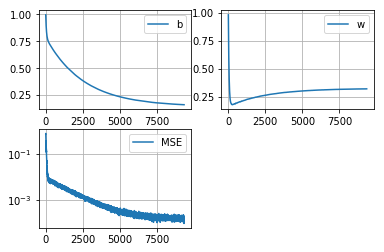

In [7]:
plt.subplot(2,2,1)
plt.plot(df1['b'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df1['w'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df1['MSE'])
plt.grid()
plt.legend();

### Test model 

In [8]:
yEst1 = w * xTest + b

Gradient Optimizer MSE = 1.550e-04


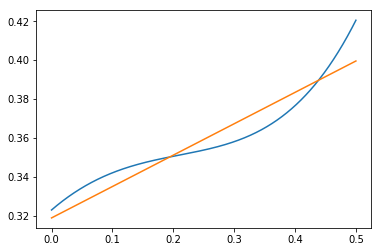

In [9]:
plt.plot(xTest, yTestClean1, xTest, yEst1);
mse1 = metrics.mean_squared_error(yTest1, yEst1)
print('Gradient Optimizer MSE = {:.3e}'.format(mse1));

## Moment optimizer

In [10]:
# Moment optimizer
train2 = tf.train.MomentumOptimizer(0.05, 0.5).minimize(Error)
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = [];
with tf.Session() as session:
    session.run(model)
    while mse > 1e-4:
        (x_, y_, yClean) = generateBatch(nBatch, True)
        _, mse, w, b = session.run([train2, Error, W, B], feed_dict={X: x_, Y: y_})
        wLearn.append((w, b, mse))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w, b=b, c=len(wLearn)))
df2 = pandas.DataFrame(wLearn, columns = ('b', 'w', 'MSE'))

Predicted model: 0.149 x + 0.322, num iteration=1286


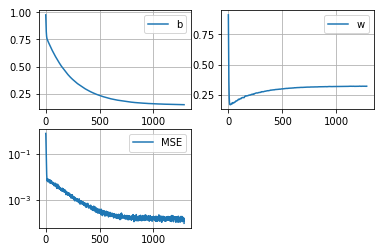

In [11]:
plt.subplot(2,2,1)
plt.plot(df2['b'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df2['w'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df2['MSE'])
plt.grid()
plt.legend();

In [12]:
yEst2 = w * xTest + b

Moment Optimizer MSE = 1.499e-04


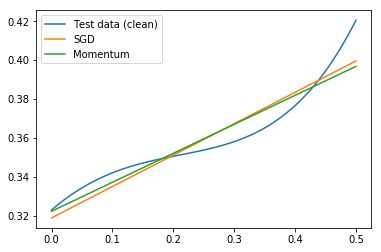

In [13]:
plt.plot(xTest, yTestClean1, xTest, yEst1, xTest, yEst2);
plt.legend(('Test data (clean)', 'SGD', 'Momentum'))
mse2 = metrics.mean_squared_error(yTest1, yEst2)
print('Moment Optimizer MSE = {:.3e}'.format(mse2));

### Adam optimizer

https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer

http://arxiv.org/pdf/1412.6980.pdf

In [14]:
# The Gradient Descent Optimizer does the heavy lifting
train3 = tf.train.AdamOptimizer(0.01, 0.1).minimize(Error)
# Initialize values, create a session and run the model
model = tf.global_variables_initializer()
mse = 1
wLearn = [];
with tf.Session() as session:
    session.run(model)
    while mse > 1e-4:
        (x_, y_, yClean) = generateBatch(nBatch, True)
        _, mse, w, b = session.run([train3, Error, W, B], feed_dict={X: x_, Y: y_})
        wLearn.append((w, b, mse))
        
    print("Predicted model: {a:.3f} x + {b:.3f}, num iteration={c}".format(a=w, b=b, c=len(wLearn)))
df3 = pandas.DataFrame(wLearn, columns = ('b', 'w', 'MSE'))

Predicted model: 0.145 x + 0.323, num iteration=1379


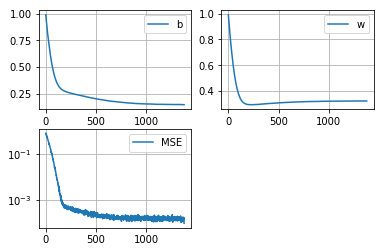

In [15]:
plt.subplot(2,2,1)
plt.plot(df3['b'])
plt.grid()
plt.legend();
plt.subplot(2,2,2)
plt.plot(df3['w'])
plt.grid()
plt.legend();
plt.subplot(2,2,3)
plt.semilogy(df3['MSE'])
plt.grid()
plt.legend();

There is a clear gain compared to the standard and momentum gradient descent : 
- Less iterations
- Less undershoot on $b$ and $w$
- Clear convergence of the MSE to the noise floor


In [16]:
yEst3 = w * xTest + b

Adam Optimizer MSE = 1.496e-04


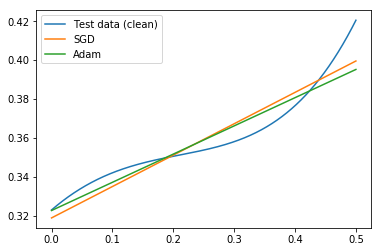

In [17]:
plt.plot(xTest, yTestClean1, xTest, yEst1, xTest, yEst3);
plt.legend(('Test data (clean)', 'SGD', 'Adam'))
mse3 = metrics.mean_squared_error(yTest1, yEst3)
print('Adam Optimizer MSE = {:.3e}'.format(mse3));

# Where to go from here ?

__Other single feature linear implementation__ [using closed form, Scipy, SKLearn or "raw" Python](LinearRegressionUnivariate.html) ([Notebook](LinearRegressionUnivariate.ipynb))

__More complex bivariation models__ [using "raw" Python](LinearRegressionBivariate.html) ([Notebook](LinearRegressionBivariate.ipynb)) up to the gradient descent with regularizer, or [using Keras](LinearRegressionBivariate-Keras.html) ([Notebook](LinearRegressionBivariate-Keras.ipynb))

__Compare with the single feature binary classification using logistic regression__ [using "raw" Python or libraries](../classification/ClassificationContinuousSingleFeature.html) ([Notebook](../classification/ClassificationContinuousSingleFeature.ipynb]))